# Calculating RMSE of SSH between QG & NATL60
(Jupyter Notebook prepared by Yingjie Liu, 2018)

Here we have 10 group of QG model data in 30 days (set 0,30th,60th..270th day data as initial conditions)

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

# Read NATL60 ssh data

In [2]:
file='NATL60OSMO-CJM165_y2012m06d14-y2013m10d01.1d_SSHdegrad.nc'
fid = nc.Dataset(file)
SSH_NAT=np.array(fid.variables["degraded_sossheig"][0:301,:,:]).squeeze()  # 301 comes from 30*10+1 and tmax=475
ssh_nat=np.zeros((SSH_NAT.shape[0],SSH_NAT.shape[1]*SSH_NAT.shape[2]))
lon1d=np.array(fid.variables["nav_lon"][:,:]).squeeze()
lat1d=np.array(fid.variables["nav_lat"][:,:]).squeeze()
for it in range(SSH_NAT.shape[0]):    #save data into ssh_nat
    xx=SSH_NAT[it,:,:]
    ssh_nat[it,:]=xx.reshape(xx.shape[0]*xx.shape[1]) #make the two dimension data into one dimension
print SSH_NAT.shape,SSH_NAT.shape[0]

(301, 301, 175) 301


# Read QG ssh data and calculate RMSE

In [3]:
ssh_new=np.zeros((31,SSH_NAT.shape[1]*SSH_NAT.shape[2])) #define new ssh in every loop 
ssh_err=np.zeros((10,31))  #define error array, we have 10 group of QG data including 30 days running
for ik in range(10):
    print ik
    n=(ik)*30  
    for i in range(31):   
        file='testdata1/ssh'+str(ik)+'_'+str(i)+'.nc'
        fids = nc.Dataset(file)
        SSH=np.array(fids.variables["SSH"][:,:]).squeeze() 
        ssh_new[i,:]=SSH.reshape(SSH.shape[0]*SSH.shape[1])   #make the two dimension data into one dimension
        ssh_sum=0
        for j in range(SSH_NAT.shape[1]):   #calculate RMSE
                ssh_sum=ssh_sum+(ssh_new[i,j]-ssh_nat[i+n,j])**2 #compare the data in the same starting point
                ssh_err[ik,i]=np.sqrt(ssh_sum/np.shape(ssh_new)[1])  #save 8 group of errors into ssh_err

0
1
2
3
4
5
6
7
8
9


In [4]:
#Calculate mean value
ssh_err_m=np.mean(ssh_err,0)

# plot

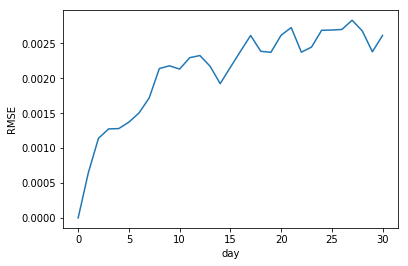

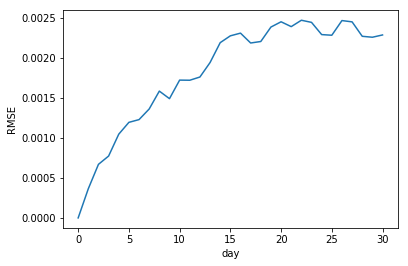

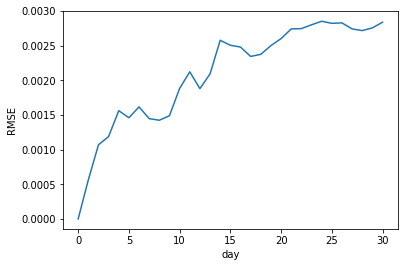

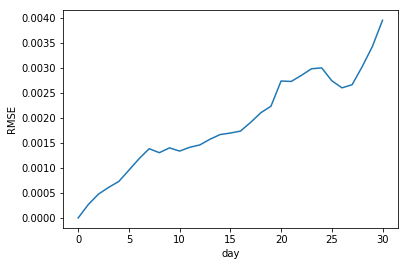

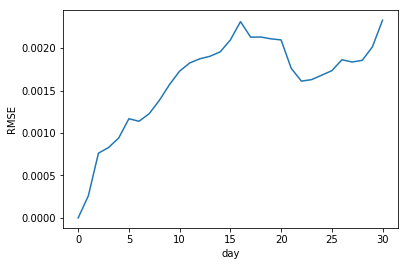

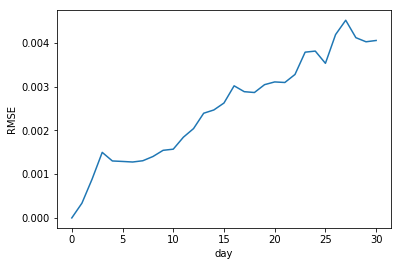

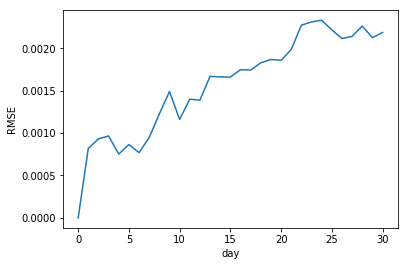

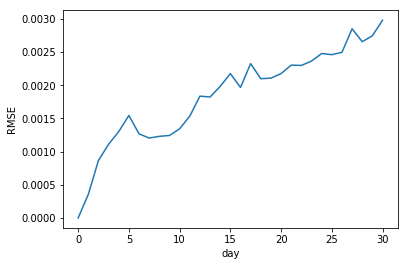

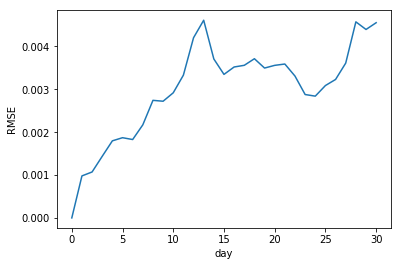

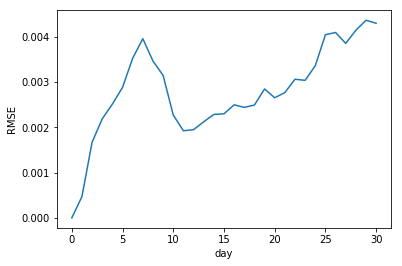

In [5]:
plt.figure()  
for ik in range(10):
    plt.plot(ssh_err[ik,:])
    plt.ylabel('RMSE')
    plt.xlabel('day')
    plt.show()
print

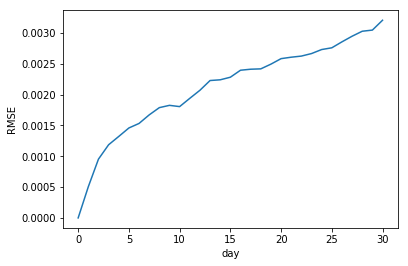

In [6]:
plt.figure()  
plt.plot(ssh_err_m)
plt.ylabel('RMSE')
plt.xlabel('day')
plt.show()